In [3]:
from skimage.feature import hog
from skimage.io import imread
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import os
%matplotlib inline

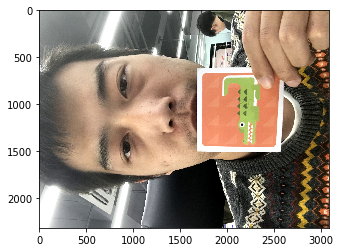

In [4]:
img_path = "./source/images/IMG_1921.jpg"
img=Image.open(img_path)
imshow(np.asarray(img))

In [40]:
np.array(img).shape

(2320, 3088, 3)

In [42]:
type(img.convert())

PIL.Image.Image

In [5]:
def resize_by_short(img, short_len=64, crop=False):
    """按照短边进行所需比例缩放"""
    (x, y) = img.size
    if x>y:
        y_s=short_len
        x_s=int(x*y_s/y)
        x_l=int(x_s/2)-int(short_len/2)
        x_r=int(x_s/2)+int(short_len/2)
        img = img.resize((x_s, y_s))
        if crop:
            box = (x_l, 0, x_r, short_len)
            img = img.crop(box)
    else:
        x_s=short_len
        y_s=int(y*x_s/x)
        y_l=int(y_s/2)-int(short_len/2)
        y_r=int(y_s/2)+int(short_len/2)
        img = img.resize((x_s, y_s))
        if crop:
            box = (0, y_l, short_len, y_r)
            img = img.crop(box)
    return img

In [6]:
def get_center_img(img, short_len=128):
    img = resize_by_short(img, short_len=short_len*2)
    (x, y) = img.size
    box = (x//2-short_len*3//4, y//2-short_len*3//4, x//2+short_len*3//4, y//2+short_len*3//4)
    img = img.crop(box).resize((short_len,short_len))
    return img

In [7]:
def devide_4_pieces(img, short_len=128):
    (x, y) = img.size
    boxs = []
    boxs.append((0,0,x//2,y//2))
    boxs.append((0,y//2,x//2,y))
    boxs.append((x//2,0,x,y//2))
    boxs.append((x//2,y//2,x,y))
    imgs = [img.crop(i).resize((short_len,short_len)) for i in boxs]
    return imgs


In [8]:
def get_6_pics(img, short_len=128):
    imgs = []
    imgs.append(img.resize((short_len, short_len)))
    imgs.append(get_center_img(img, short_len=short_len))
    imgs.extend(devide_4_pieces(img, short_len=short_len))
    return imgs

In [9]:
imgs=get_6_pics(img)

In [34]:
x=np.random.rand(10000000,5)

In [35]:
y=x[:,0]

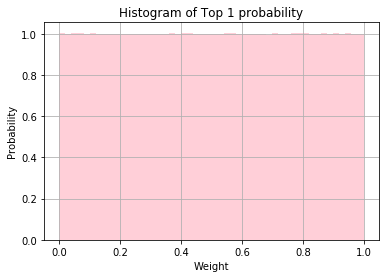

In [38]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(y, 50, density=True, facecolor='pink', alpha=0.75)
plt.xlabel('Weight')
plt.ylabel('Probability')
plt.title('Histogram of Top 1 probability')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [39]:
img.save("test.jpg")

# Remove unpaired images

In [5]:
import os
import shutil
import math

In [6]:
prefix = "/Users/miracle/Downloads/ori_labels/"
filelist = os.listdir(prefix)
pure_names = [os.path.splitext(name)[0] for name in filelist]
for i in pure_names:
    if pure_names.count(i) == 1:
        print("==> Index:",i,"Removing...")
        names_tmp = [prefix+i+'.jpg', prefix+i+'.txt']
        for name_tmp in names_tmp:
            if os.path.exists(name_tmp):
                os.remove(name_tmp)

==> Index: 1045992 Removing...
==> Index: 2042575 Removing...
==> Index: 2014733 Removing...
==> Index: 3045133 Removing...
==> Index: 2044104 Removing...
==> Index: 3042884 Removing...
==> Index: 2022281 Removing...
==> Index: 3001771 Removing...
==> Index: 1018459 Removing...
==> Index: 1029684 Removing...
==> Index: 3005271 Removing...
==> Index: 3015062 Removing...
==> Index: 2003529 Removing...
==> Index: 1018003 Removing...
==> Index: 2004246 Removing...
==> Index: 3045641 Removing...
==> Index: 1018017 Removing...
==> Index: 3013407 Removing...
==> Index: 3008741 Removing...
==> Index: 3017661 Removing...
==> Index: 3040739 Removing...
==> Index: 1027865 Removing...
==> Index: 2041068 Removing...
==> Index: 1029690 Removing...
==> Index: 3008027 Removing...
==> Index: 1040626 Removing...
==> Index: 1045986 Removing...
==> Index: 2014727 Removing...
==> Index: 2044110 Removing...
==> Index: 3006022 Removing...
==> Index: 3040077 Removing...
==> Index: 1018465 Removing...
==> Inde

==> Index: 3042502 Removing...
==> Index: 1023949 Removing...
==> Index: 3014744 Removing...
==> Index: 3005891 Removing...
==> Index: 3044173 Removing...
==> Index: 3032783 Removing...
==> Index: 1016370 Removing...
==> Index: 2003677 Removing...
==> Index: 1025486 Removing...
==> Index: 3046002 Removing...
==> Index: 2047035 Removing...
==> Index: 2001060 Removing...
==> Index: 1041114 Removing...
==> Index: 1031418 Removing...
==> Index: 2000395 Removing...
==> Index: 3044826 Removing...
==> Index: 3032768 Removing...
==> Index: 2033987 Removing...
==> Index: 3044198 Removing...
==> Index: 1042390 Removing...
==> Index: 3025572 Removing...
==> Index: 1024015 Removing...
==> Index: 1032677 Removing...
==> Index: 3023103 Removing...
==> Index: 3028056 Removing...
==> Index: 2026352 Removing...
==> Index: 2006082 Removing...
==> Index: 3009098 Removing...
==> Index: 1041699 Removing...
==> Index: 1041855 Removing...
==> Index: 2007388 Removing...
==> Index: 2026346 Removing...
==> Inde

==> Index: 3042729 Removing...
==> Index: 3045046 Removing...
==> Index: 2023954 Removing...
==> Index: 2044717 Removing...
==> Index: 1017245 Removing...
==> Index: 3008620 Removing...
==> Index: 1040021 Removing...
==> Index: 3017700 Removing...
==> Index: 1047996 Removing...
==> Index: 2040571 Removing...
==> Index: 1027535 Removing...
==> Index: 1028606 Removing...
==> Index: 2047949 Removing...
==> Index: 2008086 Removing...
==> Index: 1031357 Removing...
==> Index: 1021144 Removing...
==> Index: 3043806 Removing...
==> Index: 2004864 Removing...
==> Index: 1034549 Removing...
==> Index: 1033226 Removing...
==> Index: 1025444 Removing...
==> Index: 2023565 Removing...
==> Index: 1024982 Removing...
==> Index: 3020345 Removing...
==> Index: 1031431 Removing...
==> Index: 3010286 Removing...
==> Index: 3026734 Removing...
==> Index: 3010292 Removing...
==> Index: 1031425 Removing...
==> Index: 1027247 Removing...
==> Index: 3007936 Removing...
==> Index: 3002696 Removing...
==> Inde

==> Index: 2040405 Removing...
==> Index: 3029942 Removing...
==> Index: 1019020 Removing...
==> Index: 1020879 Removing...
==> Index: 2040375 Removing...
==> Index: 1027866 Removing...
==> Index: 1040625 Removing...
==> Index: 1045985 Removing...
==> Index: 3045124 Removing...
==> Index: 2014724 Removing...
==> Index: 3025808 Removing...
==> Index: 2022296 Removing...
==> Index: 3045642 Removing...
==> Index: 1018014 Removing...
==> Index: 3008742 Removing...
==> Index: 1013141 Removing...
==> Index: 3017662 Removing...
==> Index: 1019022 Removing...
==> Index: 3017676 Removing...
==> Index: 3016568 Removing...
==> Index: 3005272 Removing...
==> Index: 1018000 Removing...
==> Index: 3013376 Removing...
==> Index: 2042576 Removing...
==> Index: 1045991 Removing...
==> Index: 2014730 Removing...
==> Index: 3045130 Removing...
==> Index: 3042887 Removing...
==> Index: 3011561 Removing...
==> Index: 3001772 Removing...
==> Index: 3047727 Removing...
==> Index: 3031869 Removing...
==> Inde

==> Index: 2000619 Removing...
==> Index: 1018506 Removing...
==> Index: 1041315 Removing...
==> Index: 3044414 Removing...
==> Index: 2015214 Removing...
==> Index: 2043052 Removing...
==> Index: 2005007 Removing...
==> Index: 2044729 Removing...
==> Index: 3044400 Removing...
==> Index: 3009500 Removing...
==> Index: 3040666 Removing...
==> Index: 3020192 Removing...
==> Index: 3010051 Removing...
==> Index: 2041651 Removing...
==> Index: 3041578 Removing...
==> Index: 3031921 Removing...
==> Index: 2030916 Removing...
==> Index: 1046308 Removing...
==> Index: 2040229 Removing...
==> Index: 3011429 Removing...
==> Index: 1041467 Removing...
==> Index: 3044366 Removing...
==> Index: 3045078 Removing...
==> Index: 3024492 Removing...
==> Index: 3025767 Removing...
==> Index: 3018380 Removing...
==> Index: 3020179 Removing...
==> Index: 3028525 Removing...
==> Index: 3031074 Removing...
==> Index: 2023981 Removing...
==> Index: 2025328 Removing...
==> Index: 1032304 Removing...
==> Inde

==> Index: 3001798 Removing...
==> Index: 2041095 Removing...
==> Index: 3027039 Removing...
==> Index: 3031883 Removing...
==> Index: 1026238 Removing...
==> Index: 2028745 Removing...
==> Index: 1020891 Removing...
==> Index: 3016582 Removing...
==> Index: 1020649 Removing...
==> Index: 3025148 Removing...
==> Index: 3034045 Removing...
==> Index: 3019841 Removing...
==> Index: 1026210 Removing...
==> Index: 3025160 Removing...
==> Index: 3045694 Removing...
==> Index: 3004810 Removing...
==> Index: 1018498 Removing...
==> Index: 2029315 Removing...
==> Index: 3027011 Removing...
==> Index: 1029645 Removing...
==> Index: 1019786 Removing...
==> Index: 1019792 Removing...
==> Index: 3042851 Removing...
==> Index: 3004804 Removing...
==> Index: 3025174 Removing...
==> Index: 2028779 Removing...
==> Index: 1040181 Removing...
==> Index: 1026204 Removing...
==> Index: 2041917 Removing...
==> Index: 1020675 Removing...
==> Index: 3026496 Removing...
==> Index: 3019666 Removing...
==> Inde

==> Index: 3005897 Removing...
==> Index: 3042504 Removing...
==> Index: 3044175 Removing...
==> Index: 3044613 Removing...
==> Index: 3032785 Removing...
==> Index: 1017068 Removing...
==> Index: 2003671 Removing...
==> Index: 1026189 Removing...
==> Index: 3030192 Removing...
==> Index: 3017539 Removing...
==> Index: 3046010 Removing...
==> Index: 1040218 Removing...
==> Index: 3031298 Removing...
==> Index: 1046669 Removing...
==> Index: 3002652 Removing...
==> Index: 3044607 Removing...
==> Index: 3023844 Removing...
==> Index: 3005883 Removing...
==> Index: 3014756 Removing...
==> Index: 1042369 Removing...
==> Index: 3002134 Removing...
==> Index: 1041660 Removing...
==> Index: 1031387 Removing...
==> Index: 2042611 Removing...
==> Index: 3043626 Removing...
==> Index: 3015460 Removing...
==> Index: 3016169 Removing...
==> Index: 2041318 Removing...
==> Index: 2031827 Removing...
==> Index: 1029286 Removing...
==> Index: 1040230 Removing...
==> Index: 1046899 Removing...
==> Inde

==> Index: 3023104 Removing...
==> Index: 3025575 Removing...
==> Index: 1042397 Removing...
==> Index: 2034745 Removing...
==> Index: 3025561 Removing...
==> Index: 1024006 Removing...
==> Index: 3014964 Removing...
==> Index: 1030073 Removing...
==> Index: 1041852 Removing...
==> Index: 3018186 Removing...
==> Index: 2001926 Removing...
==> Index: 3028723 Removing...
==> Index: 2030245 Removing...
==> Index: 2026427 Removing...
==> Index: 2033994 Removing...
==> Index: 3030144 Removing...
==> Index: 3001399 Removing...
==> Index: 3007930 Removing...
==> Index: 3032753 Removing...
==> Index: 1023027 Removing...
==> Index: 3002690 Removing...
==> Index: 1025456 Removing...
==> Index: 3004587 Removing...
==> Index: 3005841 Removing...
==> Index: 2004876 Removing...
==> Index: 3025549 Removing...
==> Index: 2047783 Removing...
==> Index: 1031345 Removing...
==> Index: 3031528 Removing...
==> Index: 1021142 Removing...
==> Index: 3004593 Removing...
==> Index: 3043800 Removing...
==> Inde

==> Index: 3022187 Removing...
==> Index: 1022926 Removing...
==> Index: 1025091 Removing...
==> Index: 3002527 Removing...
==> Index: 1033183 Removing...
==> Index: 3004156 Removing...
==> Index: 3034095 Removing...
==> Index: 1047602 Removing...
==> Index: 2041723 Removing...
==> Index: 2007776 Removing...
==> Index: 3016552 Removing...
==> Index: 3019661 Removing...
==> Index: 1018460 Removing...
==> Index: 3001748 Removing...
==> Index: 3040072 Removing...
==> Index: 1047164 Removing...
==> Index: 3000456 Removing...
==> Index: 3044214 Removing...
==> Index: 1025093 Removing...
==> Index: 1022924 Removing...
==> Index: 3044200 Removing...
==> Index: 1018474 Removing...
==> Index: 3040066 Removing...
==> Index: 1047170 Removing...
==> Index: 3017658 Removing...
==> Index: 1040179 Removing...
==> Index: 3026485 Removing...
==> Index: 1018312 Removing...
==> Index: 3016546 Removing...
==> Index: 1033197 Removing...
==> Index: 3046359 Removing...
==> Index: 1019024 Removing...
==> Inde

==> Index: 1025468 Removing...
==> Index: 2002587 Removing...
==> Index: 2045814 Removing...
==> Index: 3044837 Removing...
==> Index: 2024232 Removing...
==> Index: 2022643 Removing...
==> Index: 2032450 Removing...
==> Index: 2026425 Removing...
==> Index: 1020504 Removing...
==> Index: 2030247 Removing...
==> Index: 1031409 Removing...
==> Index: 1041850 Removing...
==> Index: 2026343 Removing...
==> Index: 3029359 Removing...
==> Index: 1030071 Removing...
==> Index: 3000913 Removing...
==> Index: 3025563 Removing...
==> Index: 3044189 Removing...
==> Index: 2005015 Removing...
==> Index: 3044406 Removing...
==> Index: 3033856 Removing...
==> Index: 1018272 Removing...
==> Index: 2001273 Removing...
==> Index: 1031838 Removing...
==> Index: 3019715 Removing...
==> Index: 3040660 Removing...
==> Index: 2008531 Removing...
==> Index: 1040019 Removing...
==> Index: 2041657 Removing...
==> Index: 1021395 Removing...
==> Index: 2041131 Removing...
==> Index: 2009149 Removing...
==> Inde

==> Index: 3016619 Removing...
==> Index: 3011176 Removing...
==> Index: 3010268 Removing...
==> Index: 1040226 Removing...
==> Index: 3007714 Removing...
==> Index: 2004134 Removing...
==> Index: 3005103 Removing...
==> Index: 2033940 Removing...
==> Index: 3046006 Removing...
==> Index: 2003673 Removing...
==> Index: 1025482 Removing...
==> Index: 3044611 Removing...
==> Index: 3044177 Removing...
==> Index: 1032698 Removing...
==> Index: 3034490 Removing...
==> Index: 3005895 Removing...
==> Index: 3014740 Removing...
==> Index: 2008040 Removing...
==> Index: 1031391 Removing...
==> Index: 1041676 Removing...
==> Index: 1026835 Removing...
==> Index: 3016157 Removing...
==> Index: 2047757 Removing...
==> Index: 2000408 Removing...
==> Index: 3040305 Removing...
==> Index: 1041662 Removing...
==> Index: 1020288 Removing...
==> Index: 3025589 Removing...
==> Index: 3042512 Removing...
==> Index: 3005881 Removing...
==> Index: 2003667 Removing...
==> Index: 2004108 Removing...
==> Inde

==> Index: 2041976 Removing...
==> Index: 1026265 Removing...
==> Index: 2032768 Removing...
==> Index: 2040498 Removing...
==> Index: 3030256 Removing...
==> Index: 2000902 Removing...
==> Index: 1040876 Removing...
==> Index: 2044198 Removing...
==> Index: 1025022 Removing...
==> Index: 2022209 Removing...
==> Index: 3026346 Removing...
==> Index: 1019917 Removing...
==> Index: 1020628 Removing...
==> Index: 1021536 Removing...
==> Index: 2044832 Removing...
==> Index: 3032455 Removing...
==> Index: 3025129 Removing...
==> Index: 3043723 Removing...
==> Index: 3024960 Removing...
==> Index: 3007161 Removing...
==> Index: 3017372 Removing...
==> Index: 3001510 Removing...
==> Index: 3030915 Removing...
==> Index: 2040103 Removing...
==> Index: 3018727 Removing...
==> Index: 1014458 Removing...
==> Index: 1029383 Removing...
==> Index: 3041652 Removing...
==> Index: 3013672 Removing...
==> Index: 3023969 Removing...
==> Index: 1028089 Removing...
==> Index: 3028828 Removing...
==> Inde

==> Index: 2025360 Removing...
==> Index: 3032535 Removing...
==> Index: 3025049 Removing...
==> Index: 1025630 Removing...
==> Index: 1031645 Removing...
==> Index: 2008594 Removing...
==> Index: 3030322 Removing...
==> Index: 1026339 Removing...
==> Index: 3016483 Removing...
==> Index: 2031473 Removing...
==> Index: 3030444 Removing...
==> Index: 3000587 Removing...
==> Index: 1025156 Removing...
==> Index: 2025406 Removing...
==> Index: 3032253 Removing...
==> Index: 1025142 Removing...
==> Index: 3032247 Removing...
==> Index: 1033720 Removing...
==> Index: 2043797 Removing...
==> Index: 3042978 Removing...
==> Index: 2031467 Removing...
==> Index: 1027755 Removing...
==> Index: 2000862 Removing...
==> Index: 2046189 Removing...
==> Index: 2031301 Removing...
==> Index: 1028300 Removing...
==> Index: 1025624 Removing...
==> Index: 3000592 Removing...
==> Index: 3001854 Removing...
==> Index: 2000863 Removing...
==> Index: 1027754 Removing...
==> Index: 3032246 Removing...
==> Inde

==> Index: 3017429 Removing...
==> Index: 3019404 Removing...
==> Index: 1012014 Removing...
==> Index: 3040571 Removing...
==> Index: 3032681 Removing...
==> Index: 3044717 Removing...
==> Index: 1025584 Removing...
==> Index: 2008608 Removing...
==> Index: 3041647 Removing...
==> Index: 1029396 Removing...
==> Index: 3017401 Removing...
==> Index: 3018732 Removing...
==> Index: 1046751 Removing...
==> Index: 1028088 Removing...
==> Index: 2032580 Removing...
==> Index: 3043050 Removing...
==> Index: 2042701 Removing...
==> Index: 3043736 Removing...
==> Index: 3046896 Removing...
==> Index: 2040116 Removing...
==> Index: 3016079 Removing...
==> Index: 2016350 Removing...
==> Index: 3017367 Removing...
==> Index: 2040102 Removing...
==> Index: 3001511 Removing...
==> Index: 1019527 Removing...
==> Index: 2031923 Removing...
==> Index: 1040452 Removing...
==> Index: 3002018 Removing...
==> Index: 2002331 Removing...
==> Index: 3005777 Removing...
==> Index: 3041653 Removing...
==> Inde

==> Index: 1040487 Removing...
==> Index: 3018095 Removing...
==> Index: 3040598 Removing...
==> Index: 3043085 Removing...
==> Index: 2003950 Removing...
==> Index: 1025579 Removing...
==> Index: 2003788 Removing...
==> Index: 3016912 Removing...
==> Index: 3027517 Removing...
==> Index: 3031375 Removing...
==> Index: 3021600 Removing...
==> Index: 3047585 Removing...
==> Index: 3031413 Removing...
==> Index: 3046843 Removing...
==> Index: 1018820 Removing...
==> Index: 1021079 Removing...
==> Index: 1032763 Removing...
==> Index: 3033204 Removing...
==> Index: 3025466 Removing...
==> Index: 1024101 Removing...
==> Index: 2001809 Removing...
==> Index: 3011933 Removing...
==> Index: 3043913 Removing...
==> Index: 1024129 Removing...
==> Index: 3024988 Removing...
==> Index: 1025551 Removing...
==> Index: 3030043 Removing...
==> Index: 1025545 Removing...
==> Index: 2044399 Removing...
==> Index: 1030148 Removing...
==> Index: 1029419 Removing...
==> Index: 3011927 Removing...
==> Inde

==> Index: 2005930 Removing...
==> Index: 1022161 Removing...
==> Index: 2024040 Removing...
==> Index: 3025077 Removing...
==> Index: 1047935 Removing...
==> Index: 1026313 Removing...
==> Index: 1022175 Removing...
==> Index: 2004384 Removing...
==> Index: 2024054 Removing...
==> Index: 3025063 Removing...
==> Index: 1024262 Removing...
==> Index: 3032279 Removing...
==> Index: 2043971 Removing...
==> Index: 3041297 Removing...
==> Index: 1029746 Removing...
==> Index: 3040189 Removing...
==> Index: 1041405 Removing...
==> Index: 2001571 Removing...
==> Index: 3021588 Removing...
==> Index: 1025197 Removing...
==> Index: 3042775 Removing...
==> Index: 2024901 Removing...
==> Index: 2015504 Removing...
==> Index: 3032292 Removing...
==> Index: 1024289 Removing...
==> Index: 2015262 Removing...
==> Index: 3044462 Removing...
==> Index: 1031684 Removing...
==> Index: 2028685 Removing...
==> Index: 3046275 Removing...
==> Index: 3000220 Removing...
==> Index: 3019771 Removing...
==> Inde

==> Index: 3008042 Removing...
==> Index: 2030192 Removing...
==> Index: 3007417 Removing...
==> Index: 1031904 Removing...
==> Index: 2032785 Removing...
==> Index: 2023850 Removing...
==> Index: 2004237 Removing...
==> Index: 3003665 Removing...
==> Index: 3007403 Removing...
==> Index: 2031298 Removing...
==> Index: 2030838 Removing...
==> Index: 3016268 Removing...
==> Index: 1041549 Removing...
==> Index: 3009348 Removing...
==> Index: 3020902 Removing...
==> Index: 3018245 Removing...
==> Index: 3003103 Removing...
==> Index: 2014756 Removing...
==> Index: 2005868 Removing...
==> Index: 1025030 Removing...
==> Index: 1031045 Removing...
==> Index: 1013866 Removing...
==> Index: 1020148 Removing...
==> Index: 1019911 Removing...
==> Index: 2046945 Removing...
==> Index: 3026340 Removing...
==> Index: 2007919 Removing...
==> Index: 1025756 Removing...
==> Index: 2024118 Removing...
==> Index: 3034022 Removing...
==> Index: 3032453 Removing...
==> Index: 3024225 Removing...
==> Inde

==> Index: 2008592 Removing...
==> Index: 3027658 Removing...
==> Index: 2028642 Removing...
==> Index: 1031643 Removing...
==> Index: 3020137 Removing...
==> Index: 3016485 Removing...
==> Index: 2000870 Removing...
==> Index: 3020651 Removing...
==> Index: 3000581 Removing...
==> Index: 3001847 Removing...
==> Index: 1025150 Removing...
==> Index: 2005908 Removing...
==> Index: 3002396 Removing...
==> Index: 2014805 Removing...
==> Index: 1033732 Removing...
==> Index: 3025729 Removing...
==> Index: 2025400 Removing...
==> Index: 3032255 Removing...
==> Index: 3026208 Removing...
==> Index: 3010962 Removing...
==> Index: 1046385 Removing...
==> Index: 2005920 Removing...
==> Index: 2043975 Removing...
==> Index: 1034075 Removing...
==> Index: 2002097 Removing...
==> Index: 1024266 Removing...
==> Index: 2025428 Removing...
==> Index: 3025701 Removing...
==> Index: 3025067 Removing...
==> Index: 1022171 Removing...
==> Index: 2024050 Removing...
==> Index: 2004380 Removing...
==> Inde

==> Index: 3004309 Removing...
==> Index: 2004020 Removing...
==> Index: 2020196 Removing...
==> Index: 3026816 Removing...
==> Index: 3041655 Removing...
==> Index: 1018159 Removing...
==> Index: 3018734 Removing...
==> Index: 2015139 Removing...
==> Index: 3043056 Removing...
==> Index: 3013661 Removing...
==> Index: 3047556 Removing...
==> Index: 2016356 Removing...
==> Index: 3002022 Removing...
==> Index: 1023695 Removing...
==> Index: 3044077 Removing...
==> Index: 3009177 Removing...
==> Index: 1040468 Removing...
==> Index: 2041226 Removing...
==> Index: 3017349 Removing...
==> Index: 3030090 Removing...
==> Index: 3041669 Removing...
==> Index: 2008626 Removing...
==> Index: 2041540 Removing...
==> Index: 1018165 Removing...
==> Index: 2016418 Removing...
==> Index: 3019402 Removing...
==> Index: 3047218 Removing...
==> Index: 2033868 Removing...
==> Index: 3044711 Removing...
==> Index: 2015111 Removing...
==> Index: 1016274 Removing...
==> Index: 1025582 Removing...
==> Inde

==> Index: 3000179 Removing...
==> Index: 3018736 Removing...
==> Index: 3017405 Removing...
==> Index: 3030051 Removing...
==> Index: 2030378 Removing...
==> Index: 3000192 Removing...
==> Index: 3029500 Removing...
==> Index: 3044908 Removing...
==> Index: 1025543 Removing...
==> Index: 2032209 Removing...
==> Index: 2031700 Removing...
==> Index: 1021043 Removing...
==> Index: 3000838 Removing...
==> Index: 3016082 Removing...
==> Index: 2047682 Removing...
==> Index: 1020349 Removing...
==> Index: 3011935 Removing...
==> Index: 3025448 Removing...
==> Index: 3005798 Removing...
==> Index: 3023987 Removing...
==> Index: 1024891 Removing...
==> Index: 1025557 Removing...
==> Index: 3030045 Removing...
==> Index: 1031522 Removing...
==> Index: 2028523 Removing...
==> Index: 3020256 Removing...
==> Index: 3043083 Removing...
==> Index: 2034122 Removing...
==> Index: 3027511 Removing...
==> Index: 3031373 Removing...
==> Index: 2026240 Removing...
==> Index: 3031415 Removing...
==> Inde

==> Index: 2005088 Removing...
==> Index: 3003908 Removing...
==> Index: 1047933 Removing...
==> Index: 2007847 Removing...
==> Index: 3021217 Removing...
==> Index: 3029893 Removing...
==> Index: 3008685 Removing...
==> Index: 1025620 Removing...
==> Index: 2031305 Removing...
==> Index: 3020121 Removing...
==> Index: 3006858 Removing...
==> Index: 3001851 Removing...
==> Index: 3000597 Removing...
==> Index: 3021559 Removing...
==> Index: 2043793 Removing...
==> Index: 2025416 Removing...
==> Index: 1024258 Removing...
==> Index: 3032243 Removing...
==> Index: 1025146 Removing...
==> Index: 2025402 Removing...
==> Index: 2042499 Removing...
==> Index: 1025152 Removing...
==> Index: 2041190 Removing...
==> Index: 3001845 Removing...
==> Index: 3000583 Removing...
==> Index: 3010948 Removing...
==> Index: 2000872 Removing...
==> Index: 2031477 Removing...
==> Index: 3026544 Removing...
==> Index: 3016487 Removing...
==> Index: 3020135 Removing...
==> Index: 2008590 Removing...
==> Inde

==> Index: 3020294 Removing...
==> Index: 3008518 Removing...
==> Index: 2008631 Removing...
==> Index: 3019415 Removing...
==> Index: 2008625 Removing...
==> Index: 3040574 Removing...
==> Index: 1018166 Removing...
==> Index: 3044712 Removing...
==> Index: 1025581 Removing...
==> Index: 3001528 Removing...
==> Index: 2047654 Removing...
==> Index: 3026197 Removing...
==> Index: 2041225 Removing...
==> Index: 3007159 Removing...
==> Index: 1021081 Removing...
==> Index: 3018079 Removing...
==> Index: 3041483 Removing...
==> Index: 1046595 Removing...
==> Index: 3021377 Removing...
==> Index: 1047853 Removing...
==> Index: 3003868 Removing...
==> Index: 1032214 Removing...
==> Index: 1045922 Removing...
==> Index: 3045183 Removing...
==> Index: 2005856 Removing...
==> Index: 3021411 Removing...
==> Index: 3008083 Removing...
==> Index: 1041588 Removing...
==> Index: 1020162 Removing...
==> Index: 3047780 Removing...
==> Index: 3018284 Removing...
==> Index: 2004584 Removing...
==> Inde

==> Index: 2001803 Removing...
==> Index: 2047856 Removing...
==> Index: 3028606 Removing...
==> Index: 2040687 Removing...
==> Index: 3031357 Removing...
==> Index: 3021144 Removing...
==> Index: 2045933 Removing...
==> Index: 3024028 Removing...
==> Index: 1024889 Removing...
==> Index: 1022220 Removing...
==> Index: 3027521 Removing...
==> Index: 3021636 Removing...
==> Index: 2009293 Removing...
==> Index: 1041963 Removing...
==> Index: 3005780 Removing...
==> Index: 1024137 Removing...
==> Index: 3025450 Removing...
==> Index: 2031724 Removing...
==> Index: 3020500 Removing...
==> Index: 3011905 Removing...
==> Index: 1025201 Removing...
==> Index: 3025478 Removing...
==> Index: 2025751 Removing...
==> Index: 3022317 Removing...
==> Index: 1025567 Removing...
==> Index: 3042385 Removing...
==> Index: 1022208 Removing...
==> Index: 3020266 Removing...
==> Index: 3030075 Removing...
==> Index: 3027509 Removing...
==> Index: 1031512 Removing...
==> Index: 3041854 Removing...
==> Inde

==> Index: 3003910 Removing...
==> Index: 3032515 Removing...
==> Index: 2025340 Removing...
==> Index: 3019790 Removing...
==> Index: 3029653 Removing...
==> Index: 2031335 Removing...
==> Index: 1041382 Removing...
==> Index: 1026319 Removing...
==> Index: 1031665 Removing...
==> Index: 1021476 Removing...
==> Index: 3020677 Removing...
==> Index: 3040183 Removing...
==> Index: 3026206 Removing...
==> Index: 3021569 Removing...
==> Index: 1023507 Removing...
==> Index: 2002099 Removing...
==> Index: 3032273 Removing...
==> Index: 2025426 Removing...
==> Index: 1025176 Removing...
==> Index: 3001849 Removing...
==> Index: 2030765 Removing...
==> Index: 2040282 Removing...
==> Index: 1034053 Removing...
==> Index: 3025727 Removing...
==> Index: 2005906 Removing...
==> Index: 2024076 Removing...
==> Index: 1032344 Removing...
==> Index: 1034735 Removing...
==> Index: 2041822 Removing...
==> Index: 2007877 Removing...
==> Index: 1026331 Removing...
==> Index: 1020754 Removing...
==> Inde

==> Index: 3005024 Removing...
==> Index: 2033867 Removing...
==> Index: 3003455 Removing...
==> Index: 3033596 Removing...
==> Index: 3041666 Removing...
==> Index: 2008629 Removing...
==> Index: 3008500 Removing...
==> Index: 1040301 Removing...
==> Index: 2040889 Removing...
==> Index: 3026825 Removing...
==> Index: 2017709 Removing...
==> Index: 2016417 Removing...
==> Index: 3001242 Removing...
==> Index: 3009178 Removing...
==> Index: 3030921 Removing...
==> Index: 3017346 Removing...
==> Index: 3018075 Removing...
==> Index: 3041100 Removing...
==> Index: 2047880 Removing...
==> Index: 1040467 Removing...
==> Index: 2041229 Removing...
==> Index: 1023842 Removing...
==> Index: 3005742 Removing...
==> Index: 3025486 Removing...
==> Index: 3043703 Removing...
==> Index: 2016365 Removing...
==> Index: 1019506 Removing...
==> Index: 3017352 Removing...
==> Index: 1021099 Removing...
==> Index: 2031902 Removing...
==> Index: 3007627 Removing...
==> Index: 3041672 Removing...
==> Inde

==> Index: 3027522 Removing...
==> Index: 3020259 Removing...
==> Index: 3000189 Removing...
==> Index: 3027536 Removing...
==> Index: 3021147 Removing...
==> Index: 2045924 Removing...
==> Index: 1025558 Removing...
==> Index: 1022237 Removing...
==> Index: 2032212 Removing...
==> Index: 3025447 Removing...
==> Index: 3005797 Removing...
==> Index: 1020346 Removing...
==> Index: 3031432 Removing...
==> Index: 3000837 Removing...
==> Index: 3017393 Removing...
==> Index: 3043932 Removing...
==> Index: 1025216 Removing...
==> Index: 1024108 Removing...
==> Index: 2025746 Removing...
==> Index: 3019396 Removing...
==> Index: 0000397 Removing...
==> Index: 3021609 Removing...
==> Index: 1028732 Removing...
==> Index: 3009185 Removing...
==> Index: 1018829 Removing...
==> Index: 3018088 Removing...
==> Index: 3041843 Removing...
==> Index: 3007816 Removing...
==> Index: 1023101 Removing...
==> Index: 2003959 Removing...
==> Index: 1025570 Removing...
==> Index: 3023778 Removing...
==> Inde

==> Index: 3020648 Removing...
==> Index: 3000598 Removing...
==> Index: 2000869 Removing...
==> Index: 3011495 Removing...
==> Index: 3010953 Removing...
==> Index: 2041835 Removing...
==> Index: 2007860 Removing...
==> Index: 1031882 Removing...
==> Index: 1026326 Removing...
==> Index: 3040802 Removing...
==> Index: 1022140 Removing...
==> Index: 2024061 Removing...
==> Index: 3025056 Removing...
==> Index: 1032347 Removing...
==> Index: 2024075 Removing...
==> Index: 3016488 Removing...
==> Index: 2007874 Removing...
==> Index: 2041821 Removing...
==> Index: 1026332 Removing...
==> Index: 3006843 Removing...
==> Index: 2030766 Removing...
==> Index: 2046828 Removing...
==> Index: 1034050 Removing...
==> Index: 3025724 Removing...
==> Index: 3013296 Removing...
==> Index: 2042496 Removing...
==> Index: 3042754 Removing...
==> Index: 2045312 Removing...
==> Index: 3044325 Removing...
==> Index: 2005736 Removing...
==> Index: 2043763 Removing...
==> Index: 1041424 Removing...
==> Inde

==> Index: 1040470 Removing...
==> Index: 3026198 Removing...
==> Index: 3001527 Removing...
==> Index: 3030922 Removing...
==> Index: 3017345 Removing...
==> Index: 1013466 Removing...
==> Index: 1023841 Removing...
==> Index: 3005741 Removing...
==> Index: 1040302 Removing...
==> Index: 3041665 Removing...
==> Index: 3026826 Removing...
==> Index: 2018439 Removing...
==> Index: 2016414 Removing...
==> Index: 3026371 Removing...
==> Index: 1041593 Removing...
==> Index: 1025001 Removing...
==> Index: 3032304 Removing...
==> Index: 2024897 Removing...
==> Index: 3044292 Removing...
==> Index: 3045832 Removing...
==> Index: 3003867 Removing...
==> Index: 3034013 Removing...
==> Index: 1047684 Removing...
==> Index: 1047848 Removing...
==> Index: 2041969 Removing...
==> Index: 1018394 Removing...
==> Index: 3032476 Removing...
==> Index: 2003582 Removing...
==> Index: 3032310 Removing...
==> Index: 3044286 Removing...
==> Index: 1041587 Removing...
==> Index: 3026365 Removing...
==> Inde

==> Index: 1023886 Removing...
==> Index: 2034672 Removing...
==> Index: 3024990 Removing...
==> Index: 3025456 Removing...
==> Index: 3005786 Removing...
==> Index: 3025442 Removing...
==> Index: 2032217 Removing...
==> Index: 3005792 Removing...
==> Index: 2009281 Removing...
==> Index: 3031437 Removing...
==> Index: 3000832 Removing...
==> Index: 3046867 Removing...
==> Index: 1030150 Removing...
==> Index: 3021624 Removing...
==> Index: 3017396 Removing...
==> Index: 1041971 Removing...
==> Index: 2001805 Removing...
==> Index: 2047850 Removing...
==> Index: 3028166 Removing...
==> Index: 3021142 Removing...
==> Index: 3031351 Removing...
==> Index: 2003974 Removing...
==> Index: 2034100 Removing...
==> Index: 3044651 Removing...
==> Index: 2015051 Removing...
==> Index: 3023812 Removing...
==> Index: 2005242 Removing...
==> Index: 3044889 Removing...
==> Index: 1030971 Removing...
==> Index: 1041150 Removing...
==> Index: 3029481 Removing...
==> Index: 2016558 Removing...
==> Inde

==> Index: 3008116 Removing...
==> Index: 2046150 Removing...
==> Index: 3018463 Removing...
==> Index: 3046279 Removing...
==> Index: 3005354 Removing...
==> Index: 3013536 Removing...
==> Index: 3046251 Removing...
==> Index: 1047736 Removing...
==> Index: 2041617 Removing...
==> Index: 3044446 Removing...
==> Index: 3045980 Removing...
==> Index: 3045758 Removing...
==> Index: 3042751 Removing...
==> Index: 2043766 Removing...
==> Index: 2005733 Removing...
==> Index: 3042989 Removing...
==> Index: 3044320 Removing...
==> Index: 3047629 Removing...
==> Index: 1041421 Removing...
==> Index: 3006113 Removing...
==> Index: 2030788 Removing...
==> Index: 3000562 Removing...
==> Index: 2031482 Removing...
==> Index: 3009234 Removing...
==> Index: 1041435 Removing...
==> Index: 1019886 Removing...
==> Index: 3007219 Removing...
==> Index: 3000576 Removing...
==> Index: 3018339 Removing...
==> Index: 3046523 Removing...
==> Index: 2003356 Removing...
==> Index: 3042745 Removing...
==> Inde

==> Index: 3007392 Removing...
==> Index: 1032550 Removing...
==> Index: 2043821 Removing...
==> Index: 2034471 Removing...
==> Index: 2022213 Removing...
==> Index: 3004843 Removing...
==> Index: 2044196 Removing...
==> Index: 1034121 Removing...
==> Index: 3032329 Removing...
==> Index: 3025133 Removing...
==> Index: 3013481 Removing...
==> Index: 2024104 Removing...
==> Index: 1026243 Removing...
==> Index: 3019812 Removing...
==> Index: 2030171 Removing...
==> Index: 1020632 Removing...
==> Index: 2007905 Removing...
==> Index: 2026713 Removing...
==> Index: 2040496 Removing...
==> Index: 3003862 Removing...
==> Index: 3045837 Removing...
==> Index: 3024205 Removing...
==> Index: 1047681 Removing...
==> Index: 2001384 Removing...
==> Index: 3026374 Removing...
==> Index: 1041596 Removing...
==> Index: 0000185 Removing...
==> Index: 1040850 Removing...
==> Index: 3001913 Removing...
==> Index: 3008089 Removing...
==> Index: 3030516 Removing...
==> Index: 3015966 Removing...
==> Inde

==> Index: 3010565 Removing...
==> Index: 1017997 Removing...
==> Index: 2034922 Removing...
==> Index: 3044134 Removing...
==> Index: 1032803 Removing...
==> Index: 3044652 Removing...
==> Index: 2015052 Removing...
==> Index: 2005241 Removing...
==> Index: 1030972 Removing...
==> Index: 2008765 Removing...
==> Index: 2007456 Removing...
==> Index: 3016672 Removing...
==> Index: 3005140 Removing...
==> Index: 2005269 Removing...
==> Index: 1032195 Removing...
==> Index: 2003618 Removing...
==> Index: 3017544 Removing...
==> Index: 1040265 Removing...
==> Index: 1046172 Removing...
==> Index: 3030845 Removing...
==> Index: 1040503 Removing...
==> Index: 1019476 Removing...
==> Index: 1034282 Removing...
==> Index: 3015435 Removing...
==> Index: 3002149 Removing...
==> Index: 3042579 Removing...
==> Index: 1040517 Removing...
==> Index: 1019462 Removing...
==> Index: 2017679 Removing...
==> Index: 1040271 Removing...
==> Index: 3047367 Removing...
==> Index: 2002512 Removing...
==> Inde

==> Index: 3021020 Removing...
==> Index: 2022600 Removing...
==> Index: 3044874 Removing...
==> Index: 2003802 Removing...
==> Index: 2044591 Removing...
==> Index: 3015391 Removing...
==> Index: 3027445 Removing...
==> Index: 2046386 Removing...
==> Index: 3009960 Removing...
==> Index: 3016698 Removing...
==> Index: 2026314 Removing...
==> Index: 2031668 Removing...
==> Index: 3046911 Removing...
==> Index: 1029577 Removing...
==> Index: 3043869 Removing...
==> Index: 3025534 Removing...
==> Index: 3014931 Removing...
==> Index: 3029326 Removing...
==> Index: 2001783 Removing...
==> Index: 3011861 Removing...
==> Index: 3020464 Removing...
==> Index: 1031310 Removing...
==> Index: 3028038 Removing...
==> Index: 3030677 Removing...
==> Index: 2034738 Removing...
==> Index: 2042876 Removing...
==> Index: 2032349 Removing...
==> Index: 2015090 Removing...
==> Index: 1025403 Removing...
==> Index: 2017687 Removing...
==> Index: 1041191 Removing...
==> Index: 3029440 Removing...
==> Inde

==> Index: 3021381 Removing...
==> Index: 3011242 Removing...
==> Index: 1040112 Removing...
==> Index: 1026297 Removing...
==> Index: 2023697 Removing...
==> Index: 2005136 Removing...
==> Index: 3002570 Removing...
==> Index: 2031293 Removing...
==> Index: 1028292 Removing...
==> Index: 3009425 Removing...
==> Index: 1047655 Removing...
==> Index: 3000401 Removing...
==> Index: 1041542 Removing...
==> Index: 1040884 Removing...
==> Index: 2005888 Removing...
==> Index: 3003108 Removing...
==> Index: 2003221 Removing...
==> Index: 2003235 Removing...
==> Index: 1047127 Removing...
==> Index: 3019622 Removing...
==> Index: 3009431 Removing...
==> Index: 3041449 Removing...
==> Index: 3010160 Removing...
==> Index: 1047641 Removing...
==> Index: 3029939 Removing...
==> Index: 2003553 Removing...
==> Index: 3002564 Removing...
==> Index: 3033961 Removing...
==> Index: 3015018 Removing...
==> Index: 3011543 Removing...
==> Index: 1018478 Removing...
==> Index: 1046262 Removing...
==> Inde

==> Index: 1026637 Removing...
==> Index: 3001397 Removing...
==> Index: 1022337 Removing...
==> Index: 1025458 Removing...
==> Index: 2032474 Removing...
==> Index: 3007916 Removing...
==> Index: 1031405 Removing...
==> Index: 2003681 Removing...
==> Index: 1025470 Removing...
==> Index: 3024117 Removing...
==> Index: 3032775 Removing...
==> Index: 2003859 Removing...
==> Index: 2004850 Removing...
==> Index: 3005867 Removing...
==> Index: 3011812 Removing...
==> Index: 1031363 Removing...
==> Index: 2007381 Removing...
==> Index: 2001928 Removing...
==> Index: 3029355 Removing...
==> Index: 1041848 Removing...
==> Index: 3011806 Removing...
==> Index: 3009091 Removing...
==> Index: 3044191 Removing...
==> Index: 2042811 Removing...
==> Index: 1042399 Removing...
==> Index: 3005873 Removing...
==> Index: 2023545 Removing...
==> Index: 2032448 Removing...
==> Index: 3007902 Removing...
==> Index: 1046699 Removing...
==> Index: 3029427 Removing...
==> Index: 3020365 Removing...
==> Inde

==> Index: 2003643 Removing...
==> Index: 2005232 Removing...
==> Index: 3043628 Removing...
==> Index: 2004892 Removing...
==> Index: 2008070 Removing...
==> Index: 2041316 Removing...
==> Index: 3046750 Removing...
==> Index: 3016167 Removing...
==> Index: 1018733 Removing...
==> Index: 1041646 Removing...
==> Index: 1042367 Removing...
==> Index: 3025585 Removing...
==> Index: 3015446 Removing...
==> Index: 3024843 Removing...
==> Index: 3014758 Removing...
==> Index: 1031389 Removing...
==> Index: 1040570 Removing...
==> Index: 2008058 Removing...
==> Index: 2031801 Removing...
==> Index: 3046778 Removing...
==> Index: 3017251 Removing...
==> Index: 2000404 Removing...
==> Index: 2040020 Removing...
==> Index: 1041108 Removing...
==> Index: 1040216 Removing...
==> Index: 3010258 Removing...
==> Index: 3041771 Removing...
==> Index: 1026193 Removing...
==> Index: 2004104 Removing...
==> Index: 3005133 Removing...
==> Index: 3004239 Removing...
==> Index: 2002561 Removing...
==> Inde

==> Index: 3025801 Removing...
==> Index: 2024836 Removing...
==> Index: 2015433 Removing...
==> Index: 1022917 Removing...
==> Index: 3009333 Removing...
==> Index: 1018447 Removing...
==> Index: 2041089 Removing...
==> Index: 3031647 Removing...
==> Index: 3042871 Removing...
==> Index: 2042580 Removing...
==> Index: 1032537 Removing...
==> Index: 1045967 Removing...
==> Index: 2005813 Removing...
==> Index: 3014389 Removing...
==> Index: 1032251 Removing...
==> Index: 3025154 Removing...
==> Index: 3005284 Removing...
==> Index: 1020655 Removing...
==> Index: 1047816 Removing...
==> Index: 1026224 Removing...
==> Index: 2008489 Removing...
==> Index: 3017680 Removing...
==> Index: 1026230 Removing...
==> Index: 3027757 Removing...
==> Index: 3017694 Removing...
==> Index: 2020311 Removing...
==> Index: 1032245 Removing...
==> Index: 3033722 Removing...
==> Index: 3025140 Removing...
==> Index: 3015083 Removing...
==> Index: 2044683 Removing...
==> Index: 3022149 Removing...
==> Inde

==> Index: 3011434 Removing...
==> Index: 3025791 Removing...
==> Index: 2005768 Removing...
==> Index: 1023599 Removing...
==> Index: 3045065 Removing...
==> Index: 1033952 Removing...
==> Index: 1032494 Removing...
==> Index: 3031914 Removing...
==> Index: 3016373 Removing...
==> Index: 3009253 Removing...
==> Index: 3020819 Removing...
==> Index: 2045364 Removing...
==> Index: 1016150 Removing...
==> Index: 2015235 Removing...
==> Index: 3018438 Removing...
==> Index: 1047745 Removing...
==> Index: 2008502 Removing...
==> Index: 3016401 Removing...
==> Index: 3041559 Removing...
==> Index: 2005032 Removing...
==> Index: 2043701 Removing...
==> Index: 3044347 Removing...
==> Index: 3042736 Removing...
==> Index: 3046550 Removing...
==> Index: 2047567 Removing...
==> Index: 1041446 Removing...
==> Index: 3011408 Removing...
==> Index: 3040121 Removing...
==> Index: 3021520 Removing...
==> Index: 3010925 Removing...
==> Index: 2009185 Removing...
==> Index: 3028262 Removing...
==> Inde

==> Index: 3042482 Removing...
==> Index: 3024061 Removing...
==> Index: 2015195 Removing...
==> Index: 3041835 Removing...
==> Index: 1041094 Removing...
==> Index: 3007874 Removing...
==> Index: 1025512 Removing...
==> Index: 2005392 Removing...
==> Index: 2015181 Removing...
==> Index: 2025724 Removing...
==> Index: 3043788 Removing...
==> Index: 3030766 Removing...
==> Index: 1028750 Removing...
==> Index: 3031478 Removing...
==> Index: 3033247 Removing...
==> Index: 3023054 Removing...
==> Index: 2020674 Removing...
==> Index: 1026755 Removing...
==> Index: 3021125 Removing...
==> Index: 3041809 Removing...
==> Index: 3031336 Removing...
==> Index: 2029650 Removing...
==> Index: 2046297 Removing...
==> Index: 1022241 Removing...
==> Index: 3044965 Removing...
==> Index: 2032502 Removing...
==> Index: 3031322 Removing...
==> Index: 3007690 Removing...
==> Index: 1029314 Removing...
==> Index: 3027540 Removing...
==> Index: 3026886 Removing...
==> Index: 2020660 Removing...
==> Inde

==> Index: 3005068 Removing...
==> Index: 2015152 Removing...
==> Index: 2008665 Removing...
==> Index: 3018039 Removing...
==> Index: 3009134 Removing...
==> Index: 2002348 Removing...
==> Index: 2005427 Removing...
==> Index: 2034822 Removing...
==> Index: 2033195 Removing...
==> Index: 2003056 Removing...
==> Index: 3043983 Removing...
==> Index: 1040403 Removing...
==> Index: 3031483 Removing...
==> Index: 2009235 Removing...
==> Index: 3047515 Removing...
==> Index: 2002360 Removing...
==> Index: 3005726 Removing...
==> Index: 2004711 Removing...
==> Index: 3013622 Removing...
==> Index: 3005040 Removing...
==> Index: 3043015 Removing...
==> Index: 3001226 Removing...
==> Index: 3011035 Removing...
==> Index: 3027587 Removing...
==> Index: 2000211 Removing...
==> Index: 2046244 Removing...
==> Index: 2040621 Removing...
==> Index: 1013373 Removing...
==> Index: 3041616 Removing...
==> Index: 2045759 Removing...
==> Index: 3043001 Removing...
==> Index: 2045981 Removing...
==> Inde

==> Index: 3010289 Removing...
==> Index: 2003862 Removing...
==> Index: 2045837 Removing...
==> Index: 1022324 Removing...
==> Index: 2034016 Removing...
==> Index: 1032889 Removing...
==> Index: 3025554 Removing...
==> Index: 2032301 Removing...
==> Index: 1028609 Removing...
==> Index: 1030046 Removing...
==> Index: 3011829 Removing...
==> Index: 1031358 Removing...
==> Index: 2026360 Removing...
==> Index: 3046965 Removing...
==> Index: 1030052 Removing...
==> Index: 3000930 Removing...
==> Index: 3017294 Removing...
==> Index: 1023990 Removing...
==> Index: 3005848 Removing...
==> Index: 3024886 Removing...
==> Index: 1023748 Removing...
==> Index: 3015483 Removing...
==> Index: 3025540 Removing...
==> Index: 2032473 Removing...
==> Index: 3025226 Removing...
==> Index: 1022330 Removing...
==> Index: 3023657 Removing...
==> Index: 3024138 Removing...
==> Index: 3032772 Removing...
==> Index: 2003686 Removing...
==> Index: 1031402 Removing...
==> Index: 3030165 Removing...
==> Inde

==> Index: 3019681 Removing...
==> Index: 3029742 Removing...
==> Index: 2015392 Removing...
==> Index: 3044592 Removing...
==> Index: 2005195 Removing...
==> Index: 3045840 Removing...
==> Index: 2015386 Removing...
==> Index: 3045698 Removing...
==> Index: 3034061 Removing...
==> Index: 2007782 Removing...
==> Index: 3040086 Removing...
==> Index: 1019952 Removing...
==> Index: 3041398 Removing...
==> Index: 1029649 Removing...
==> Index: 1042003 Removing...
==> Index: 3000449 Removing...
==> Index: 3041373 Removing...
==> Index: 3011544 Removing...
==> Index: 3001757 Removing...
==> Index: 1018319 Removing...
==> Index: 1030495 Removing...
==> Index: 2007769 Removing...
==> Index: 1018025 Removing...
==> Index: 3003632 Removing...
==> Index: 3013421 Removing...
==> Index: 1032296 Removing...
==> Index: 3033929 Removing...
==> Index: 3044579 Removing...
==> Index: 3016559 Removing...
==> Index: 2047359 Removing...
==> Index: 1030481 Removing...
==> Index: 3008767 Removing...
==> Inde

==> Index: 3005137 Removing...
==> Index: 2004100 Removing...
==> Index: 3023696 Removing...
==> Index: 1024958 Removing...
==> Index: 1026197 Removing...
==> Index: 3041775 Removing...
==> Index: 3031292 Removing...
==> Index: 3011142 Removing...
==> Index: 1030093 Removing...
==> Index: 2006071 Removing...
==> Index: 2040024 Removing...
==> Index: 2000400 Removing...
==> Index: 3017255 Removing...
==> Index: 3018166 Removing...
==> Index: 1028804 Removing...
==> Index: 3005889 Removing...
==> Index: 1023951 Removing...
==> Index: 3013033 Removing...
==> Index: 3025581 Removing...
==> Index: 3024847 Removing...
==> Index: 3015442 Removing...
==> Index: 3022205 Removing...
==> Index: 3044180 Removing...
==> Index: 2004855 Removing...
==> Index: 3043837 Removing...
==> Index: 2007384 Removing...
==> Index: 1030078 Removing...
==> Index: 3029436 Removing...
==> Index: 3007913 Removing...
==> Index: 1031400 Removing...
==> Index: 3030167 Removing...
==> Index: 2034028 Removing...
==> Inde

==> Index: 3009240 Removing...
==> Index: 1041441 Removing...
==> Index: 3040126 Removing...
==> Index: 2009169 Removing...
==> Index: 3041238 Removing...
==> Index: 1047030 Removing...
==> Index: 1033969 Removing...
==> Index: 3042731 Removing...
==> Index: 3004764 Removing...
==> Index: 1016625 Removing...
==> Index: 2045820 Removing...
==> Index: 3025225 Removing...
==> Index: 1031429 Removing...
==> Index: 3001393 Removing...
==> Index: 3011180 Removing...
==> Index: 1030051 Removing...
==> Index: 2009380 Removing...
==> Index: 3029379 Removing...
==> Index: 2026363 Removing...
==> Index: 2047951 Removing...
==> Index: 3028067 Removing...
==> Index: 2032316 Removing...
==> Index: 3004599 Removing...
==> Index: 1023987 Removing...
==> Index: 2044294 Removing...
==> Index: 3025557 Removing...
==> Index: 3000927 Removing...
==> Index: 2026377 Removing...
==> Index: 1020256 Removing...
==> Index: 2003861 Removing...
==> Index: 2034015 Removing...
==> Index: 1022327 Removing...
==> Inde

==> Index: 1041253 Removing...
==> Index: 2041703 Removing...
==> Index: 1047622 Removing...
==> Index: 3000476 Removing...
==> Index: 3018239 Removing...
==> Index: 3031873 Removing...
==> Index: 2041065 Removing...
==> Index: 3010665 Removing...
==> Index: 3009334 Removing...
==> Index: 3040052 Removing...
==> Index: 3002261 Removing...
==> Index: 2015434 Removing...
==> Index: 3025806 Removing...


# Rename Pictures and pack them

In [11]:
pointer


3457

In [10]:
name_pairs =[('yy', 350)] #[('zzy', 600),('shh', 500), ('wl', 400), ('zjl', 500), ('zrs', 400), ('zxg', 50), ('lyh', 300), ('gxj', 100), ('yy', 350), ('lqn', 250)]
prefix = "/Users/miracle/Downloads/ori_labels/"
filelist = os.listdir(prefix)
pure_names = list(set([os.path.splitext(name)[0] for name in filelist]))
pure_names = [name for name in pure_names if not name.startswith('.')]

for name_str,num_label in name_pairs:
    dir_prefix = "/Users/miracle/Downloads/labels_finished/"+name_str+'/'
    
    print(len(filelist))
    names_part = pure_names[pointer:pointer+num_label]
    
    for i, old_name in enumerate(names_part):
        if i%50 == 0:
            if i//50 != 0:
                shutil.make_archive(new_dir_name[:-1], 'zip', new_dir_name)
            new_dir_name = dir_prefix+name_str+'_'+str(i//50)+'_50/' 
            os.makedirs(new_dir_name)
        shutil.copy(prefix+old_name+'.jpg', new_dir_name+str(i)+'_'+name_str+'.jpg')
        shutil.copy(prefix+old_name+'.txt', new_dir_name+str(i)+'_'+name_str+'.txt')
    shutil.make_archive(new_dir_name[:-1], 'zip', new_dir_name)
    pointer += num_label

7574


In [95]:
name_str = 'wl'
prefix = "/Users/miracle/Downloads/wl/"
new_prefix = "/Users/miracle/Downloads/wl_copy/"
dir_prefix = "/Users/miracle/Downloads/labels_finished/"
filelist = os.listdir(prefix)
print(len(filelist))
pure_names = list(set([os.path.splitext(name)[0] for name in filelist]))
for i, old_name in enumerate(pure_names):
#     try:
    shutil.copy(prefix+old_name+'.jpg', new_prefix+str(i)+'_'+name_str+'.jpg')
    shutil.copy(prefix+old_name+'.txt', new_prefix+str(i)+'_'+name_str+'.txt')
#     except:
#         pass
dir_num = math.ceil(len(pure_names)/50)
for i in range(dir_num):
    new_dir_name = dir_prefix+name_str+'_'+str(i)+'_50/' 
    os.mkdir(new_dir_name)
    for j in range(50):
        pure_names_2 = [str(i*50+j)+'_'+name_str+'.jpg', str(i*50+j)+'_'+name_str+'.txt']
        shutil.copy(new_prefix+pure_names_2[0], new_dir_name+pure_names_2[0])
        shutil.copy(new_prefix+pure_names_2[1], new_dir_name+pure_names_2[1])
    shutil.make_archive(new_dir_name[:-1], 'zip', new_dir_name)

1088


FileNotFoundError: [Errno 2] No such file or directory: '/Users/miracle/Downloads/wl_copy/544_wl.jpg'

In [63]:
math.ceil(6/5)

2

In [68]:
p='qwer'
p[:-1]

'qwe'